In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt     #I am pretty sure pyplot is the original functionality of matplotlib
import matplotlib.ticker as ticker
import numpy as np

In [2]:
df = pd.read_csv("outputzingnews.csv")

In [3]:
print(df.keys())

Index(['link', 'Chủ đề', 'Tiêu đề', 'Tóm tắt', 'Nội dung', 'Thời gian',
       'Tác giả'],
      dtype='object')


In [4]:
df['Tác giả'].value_counts()

Giang Tiểu San           10
Hạnh Trà                  8
Khánh Linh                7
Di Hy                     7
Uyên Uyên                 7
                         ..
Gia Nguyễn                1
Phương Văn                1
Song Phúc                 1
Kim Cang                  1
Việt Tường - Nhật Tân     1
Name: Tác giả, Length: 125, dtype: int64

In [5]:
time1 = df[df['Thời gian'].str.contains('08/08/2020')]
author = time1['Tác giả']
title_1 = time1['Chủ đề']
print(author)

5        Bích Hằng
25      Uyên Hoàng
78     Kiều Trang 
156      Bích Hằng
176     Uyên Hoàng
229    Kiều Trang 
Name: Tác giả, dtype: object


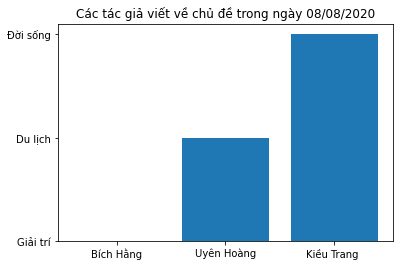

In [6]:
plt.bar(author, title_1)
plt.title('Các tác giả viết về chủ đề trong ngày 08/08/2020')
plt.show()

In [7]:
new = df.groupby('Chủ đề')
new1 = new.get_group('Kinh doanh')

In [8]:
author_count = new1['Tác giả'].value_counts()


Text(0.5, 1.0, 'Số lượng bài báo kinh doanh của từng tác giả')

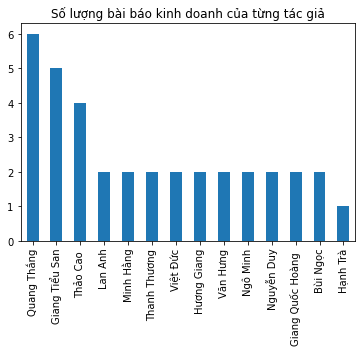

In [9]:
my_plot = author_count.plot(kind = 'bar')
my_plot.set_title('Số lượng bài báo kinh doanh của từng tác giả')

In [10]:
author_count_total =  df['Tác giả'].value_counts() 
author_table = pd.DataFrame({'Count': author_count_total})
author_if = author_table[author_table['Count'] > 5]

                Count
Giang Tiểu San     10
Hạnh Trà            8
Khánh Linh          7
Di Hy               7
Uyên Uyên           7
Quang Thắng         6
Việt Tường          6
Diệp Trà            6


Text(0.5, 1.0, 'Số lượng bài báo của từng tác giả có bài viết lớn hơn 5 bài')

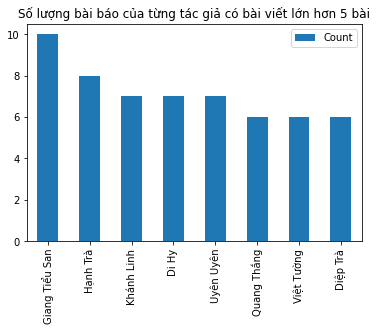

In [11]:
print(author_if)
author_table_1 = author_if.plot(kind = 'bar')
author_table_1.set_title('Số lượng bài báo của từng tác giả có bài viết lớn hơn 5 bài')

In [12]:
time_count = df['Thời gian'].value_counts()


In [13]:
time_business = new1['Thời gian'].value_counts()
print(time_business)

05/08/2020    26
06/08/2020     8
07/08/2020     2
Name: Thời gian, dtype: int64


In [14]:
time_table = pd.DataFrame({'Total' : time_count,'Business': time_business})
time_table
                           

,Total,Business
05/08/2020,260,26.0
06/08/2020,50,8.0
07/08/2020,22,2.0
08/08/2020,6,NaN
09/08/2020,2,NaN
10/08/2020,4,NaN
15/08/2020,1,NaN
16/08/2020,3,NaN


Text(0.5, 1.0, 'Số lượng bài báo trong từng ngày')

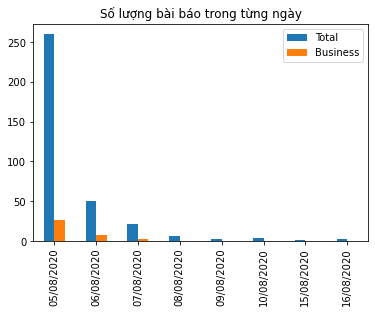

In [15]:
time_plot = time_table.plot(kind = 'bar')
time_plot.set_title('Số lượng bài báo trong từng ngày') 

In [16]:
time_day_05 = df[df['Thời gian'].str.contains('05/08/2020')]
time_chac = time_day_05['Chủ đề'].value_counts() 
time_chac

Thế giới      33
Thể thao      32
Xã hội        29
Kinh doanh    26
Giải trí      25
Công nghệ     23
Pháp luật     18
Đời sống      16
Sức khỏe      16
Thời trang    13
Xuất bản       7
Phim ảnh       7
Giáo dục       6
Xe             3
Âm nhạc        2
Nhịp sống      2
Du lịch        1
Ẩm thực        1
Name: Chủ đề, dtype: int64

In [17]:
table_day_05 = pd.DataFrame({'total' : time_chac})
table_05 = table_day_05[table_day_05['total'] > 13]


In [18]:
table_05

,total
Thế giới,33
Thể thao,32
Xã hội,29
Kinh doanh,26
Giải trí,25
Công nghệ,23
Pháp luật,18
Đời sống,16
Sức khỏe,16


In [19]:
table_1 = table_day_05[table_day_05['total'] <13].sum()
table_2 = pd.DataFrame({'total': table_1})
table_2

,total
total,29


In [20]:
table_12 = table_05.append(table_2)

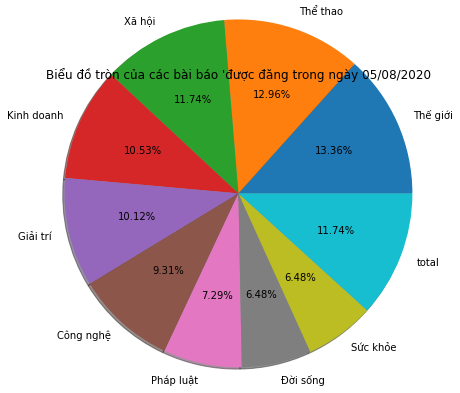

In [21]:
plt.pie(x = table_12['total'], labels = table_12.index, radius = 2, autopct = "%0.2f%%", shadow = True)
plt.title("Biểu đồ tròn của các bài báo 'được đăng trong ngày 05/08/2020")
plt.show()